In [ ]:
!pip install visualise-spacy-tree

  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re

In [ ]:
# folders = glob.glob("/content/drive/MyDrive/dataset/NLP_UNGDC_1970-2020/TXT/Session*")
# df = pd.DataFrame(columns={"Country","Speech","Session","Year"})
# i = 0
# for folder in folders:
#   speech = glob.glob(folder+"/IND*.txt")
#   # if ".txt" in speech:
#   exe = " ".join(speech)
#   if ".txt" in exe:
#     with open(exe,encoding="utf") as f:
#       df.loc[i,"Speech"] = f.read()
#       df.loc[i,"Year"] = exe.split('_')[-1].split('.')[0]
#       # Session
#       df.loc[i,'Session'] = exe.split('_')[-2]
#       # Country
#       df.loc[i,'Country'] = exe.split("_")[-3].split("/")[-1]
#       # Increment counter
#       i += 1 

In [ ]:
# df.head()

In [ ]:
# df.shape

In [ ]:
# for folder in folders:
#   speech = glob.glob(folder+"/IND*.txt")
#   # if ".txt" in speech:
#   exe = " ".join(speech)
#   if ".txt" in exe:
#     with open(exe,encoding="utf") as f:
#       print(exe.split("_")[-3].split("/")[-1])
#       break

In [ ]:
folders = glob.glob("/content/drive/MyDrive/dataset/NLP_SESSION/IND*")
df = pd.DataFrame(columns={"Country","Speech","Session","Year"})
i = 0

for folder in folders:
  with open(folder,encoding="utf") as f:
    df.loc[i,"Speech"] = f.read()
    df.loc[i,"Year"] = folder.split('_')[-1].split('.')[0]
    # Session
    df.loc[i,'Session'] = folder.split('_')[-2]
    # Country
    df.loc[i,'Country'] = folder.split("_")[-3].split("/")[-1]
    # Increment counter
    i += 1 

In [ ]:
df.head()

,Speech,Session,Country,Year
0,"38.\tMr. President, on behalf of the people of...",26,IND,1971
1,"Mr. President, I have already had occasion to ...",29,IND,1974
2,"﻿122.\tMr. President, I bring to you and to al...",28,IND,1973
3,"Mr. President, I offer you on behalf of India ...",27,IND,1972
4,"40.\t Mr. President, I offer you our congratul...",25,IND,1970


In [ ]:
df.shape

(51, 4)

In [ ]:
df.loc[0,'Speech']

"38.\tMr. President, on behalf of the people of India, we offer you our warmest congratulations on your election as President of this session of the General Assembly. This is a fitting tribute to your achievements as the Foreign Minister of Indonesia and to your interest in the political and economic problems of the world. As a fellow Asian. I take particular pride in your elevation to this high office. Indonesia and India have worked together in so many fields since we both achieved\nour independence, and we have so much in common through history and geography, that I need hardly assure you of our fullest co-operation in the discharge of your responsibilities.\n39.\tWe should also like to compliment our outgoing President, Mr. Edvard Hambro of Norway, for the skill, independence and patience with which he guided our deliberations and for his stewardship of the commemorative session last year. The world may not care for nor long remember the millions of words we utter here, but the imp

In [ ]:
def clean(text):

  # removing paragraph number
  text = re.sub("[0-9]+.\t","",str(text))
  # removing new line characters
  text = re.sub('\n ','',str(text))
  text = re.sub('\n',' ',str(text))
  # removing apostrophes
  text = re.sub("'s",'',str(text))
  # removing hyphens
  text = re.sub("-",' ',str(text))
  text = re.sub("— ",'',str(text))
  # removing quotation marks
  text = re.sub('\"','',str(text))
  # removing salutations
  text = re.sub("Mr\.",'Mr',str(text))
  text = re.sub("Mrs\.",'Mrs',str(text))
  # removing any reference to outside text
  text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    
  return text 

df["Speech_clean"] = df["Speech"].apply(clean)

In [ ]:
df.head()

,Speech,Session,Country,Year,Speech_clean
0,"38.\tMr. President, on behalf of the people of...",26,IND,1971,"Mr President, on behalf of the people of India..."
1,"Mr. President, I have already had occasion to ...",29,IND,1974,"Mr President, I have already had occasion to c..."
2,"﻿122.\tMr. President, I bring to you and to al...",28,IND,1973,"﻿Mr President, I bring to you and to all our c..."
3,"Mr. President, I offer you on behalf of India ...",27,IND,1972,"Mr President, I offer you on behalf of India o..."
4,"40.\t Mr. President, I offer you our congratul...",25,IND,1970,"Mr President, I offer you our congratulations..."


In [ ]:
# split sentences
def sentences(text):
  # split sentences and questions
  text = re.split('[.?]',text)
  clean_sent = []
  for sent in text:
    clean_sent.append(sent)
  return clean_sent

df["sent"] = df["Speech_clean"].apply(sentences)

In [ ]:
df.head()

,Speech,Session,Country,Year,Speech_clean,sent
0,"38.\tMr. President, on behalf of the people of...",26,IND,1971,"Mr President, on behalf of the people of India...","[Mr President, on behalf of the people of Indi..."
1,"Mr. President, I have already had occasion to ...",29,IND,1974,"Mr President, I have already had occasion to c...","[Mr President, I have already had occasion to ..."
2,"﻿122.\tMr. President, I bring to you and to al...",28,IND,1973,"﻿Mr President, I bring to you and to all our c...","[﻿Mr President, I bring to you and to all our ..."
3,"Mr. President, I offer you on behalf of India ...",27,IND,1972,"Mr President, I offer you on behalf of India o...","[Mr President, I offer you on behalf of India ..."
4,"40.\t Mr. President, I offer you our congratul...",25,IND,1970,"Mr President, I offer you our congratulations...","[ Mr President, I offer you our congratulation..."


In [ ]:
# Create a dataframe containing sentences
df2 = pd.DataFrame(columns=["Sent","Year","Len"])

row_list = []
for i in range(1,len(df)):
  # for-loop to go over the sentences in the speech
  for sent in df.loc[i,"sent"]:
    wordcount = len(sent.split())
    year = df.loc[i,"Year"]
    dict1 = {"Year":year,"Sent":sent,"wordcount":wordcount}
    row_list.append(dict1)



In [ ]:
row_list

[{'Sent': 'Mr President, I have already had occasion to congratulate you on your unanimous election, and also to welcome the three new Members to our Organization',
  'Year': '1974',
  'wordcount': 25},
 {'Sent': ' On the present occasion I am happy to convey to the Secretary  General, Mr Kurt Waldheim, our appreciation of his ceaseless endeavors in the cause of peace and in the fulfillment of the principles and purposes of the Charter',
  'Year': '1974',
  'wordcount': 39},
 {'Sent': ' We are fortunate indeed in having him as our Secretary General today, when his views are needed on collective and co operative action to tackle the diverse and urgent problems facing mankind at present',
  'Year': '1974',
  'wordcount': 34},
 {'Sent': ' In the 29 years of its existence the United Nations has come to represent the overwhelming majority of the peoples and nations of the world',
  'Year': '1974',
  'wordcount': 25},
 {'Sent': ' While this is indeed a matter for satisfaction, it is the few 

In [ ]:
df2 = pd.DataFrame(row_list)

In [ ]:
df2.head()

,Year,Sent,wordcount
0,1974,"Mr President, I have already had occasion to c...",25
1,1974,On the present occasion I am happy to convey ...,39
2,1974,We are fortunate indeed in having him as our ...,34
3,1974,In the 29 years of its existence the United N...,25
4,1974,While this is indeed a matter for satisfactio...,20


In [ ]:
df2.shape

(7032, 3)

In [ ]:
import spacy
from spacy.matcher import Matcher

from spacy import displacy
# import visualise_spacy_tree
from IPython.display import Image, display

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [ ]:
# Function to find sentences containing PMs of India
def find_names(text):
    
    names = []
    
    # Create a spacy doc
    doc = nlp(text)
    
    # Define the pattern
    pattern = [{'LOWER':'prime'},
              {'LOWER':'minister'},
              {'POS':'ADP','OP':'?'},
              {'POS':'PROPN'}]
                
    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("names", None, pattern) 

    matches = matcher(doc)

    # Finding patterns in the text
    for i in range(0,len(matches)):
        
        # match: id, start, end
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))
    
    # Only keep sentences containing Indian PMs
    for name in names:
        if (name.split()[2] == 'of') and (name.split()[3] != "India"):
                names.remove(name)
            
    return names

# Apply function
df2['PM_Names'] = df2['Sent'].apply(find_names)

In [ ]:
df2.tail()

,Year,Sent,wordcount,PM_Names
7027,2020,I am confident that on the occasion of its 75...,32,[]
7028,2020,Stability in the United Nations and empowerme...,19,[]
7029,2020,On the occasion of the 75th anniversary of th...,25,[]
7030,2020,Thank you,2,[]
7031,2020,,0,[]


In [ ]:
# look at sentences for a specific year
for i in range(len(df2)):
    if df2.loc[i,'Year'] in ['1984']:
        if len(df2.loc[i,'PM_Names'])!=0:
            print('->',df2.loc[i,'Sent'],'\n')

->  In November 1948, the first Prime Minister of India, Pandit Jawaharlal Nehru, addressing the General Assembly' on behalf of newly independent India, stated that the Charter of the United Nations, in noble language, had laid down the principles and purposes of that great Organization, and he thought it would not be possible to improve upon that language 

->  As Prime Minister Indira Gandhi said in her address to the Seventh Conference of Heads of State or Government of Non Aligned Countries, held at New Delhi from 7 to 12 March 1983: Its significance is not to be measured by the number of divisions or the megatons of destructive power we command, but by the intensity with which we desire peace and freedom, development and international justice 

->  A major peace initiative in this regard was taken recently by the Prime Minister of India, Mrs Indira Gandhi, together with the Heads of State or Government of Argentina, Greece, Mexico, Sweden and the United Republic of Tanzania 

->  

In [ ]:
count = 0
for i in range(0,len(df2)):
  if len(df2.loc[i,"PM_Names"]) != 0:
    count+=1

print(count)

58


In [ ]:
# Function to check if keyswords like 'programs','schemes', etc. present in sentences

def prog_sent(text):
    
    patterns = [r'\b(?i)'+'plan'+r'\b',
               r'\b(?i)'+'programme'+r'\b',
               r'\b(?i)'+'scheme'+r'\b',
               r'\b(?i)'+'campaign'+r'\b',
               r'\b(?i)'+'initiative'+r'\b',
               r'\b(?i)'+'conference'+r'\b',
               r'\b(?i)'+'agreement'+r'\b',
               r'\b(?i)'+'alliance'+r'\b']

    output = []
    flag = 0
    
    # Look for patterns in the text
    for pat in patterns:
        if re.search(pat, text) != None:
            flag = 1
            break
    return flag 

# Apply function
df2['Check_Schemes'] = df2['Sent'].apply(prog_sent)

In [ ]:
df2.head()

,Year,Sent,wordcount,PM_Names,Check_Schemes
0,1974,"Mr President, I have already had occasion to c...",25,[],0
1,1974,On the present occasion I am happy to convey ...,39,[],0
2,1974,We are fortunate indeed in having him as our ...,34,[],0
3,1974,In the 29 years of its existence the United N...,25,[],0
4,1974,While this is indeed a matter for satisfactio...,20,[],0


In [ ]:
# Sentences that contain the initiative words
count = 0
for i in range(len(df2)):
    if df2.loc[i,'Check_Schemes'] == 1:
        count+=1
print(count)

420


In [ ]:
def all_schemes(text,check):
  schemes = []

  doc = nlp(text)
  prog_list = ['programme','scheme',
                 'initiative','campaign',
                 'agreement','conference',
                 'alliance','plan']

  
  pattern = [{"POS":"DET"},
             {"POS":"PROPN","DEP":"compound"},
             {'POS':'PROPN','DEP':'compound'},
             {'POS':'PROPN','OP':'?'},
             {'POS':'PROPN','OP':'?'},
             {'POS':'PROPN','OP':'?'},
             {'LOWER':{'IN':prog_list},'OP':'+'}]


  if check == 0:
    return schemes


  matcher = Matcher(nlp.vocab)
  matcher.add("matching",None,pattern)

  matches = matcher(doc)


  for i in range(0,len(matches)):
    # match: id, start, end
    start,end=matches[i][1],matches[i][2]

    if doc[start].pos == "DET":
      start = start+1

    span = str(doc[start:end])

    if (len(schemes) != 0) and (schemes[-1] in span):
      schemes[-1] = span
    else:
      schemes.append(span)

  
  return schemes


# apply function
df2['Schemes1'] = df2.apply(lambda x:all_schemes(x.Sent,x.Check_Schemes),axis=1)

In [ ]:

df2.head()

,Year,Sent,wordcount,PM_Names,Check_Schemes,Schemes1
0,1974,"Mr President, I have already had occasion to c...",25,[],0,[]
1,1974,On the present occasion I am happy to convey ...,39,[],0,[]
2,1974,We are fortunate indeed in having him as our ...,34,[],0,[]
3,1974,In the 29 years of its existence the United N...,25,[],0,[]
4,1974,While this is indeed a matter for satisfactio...,20,[],0,[]


In [ ]:
count = 0
for i in range(len(df2)):
  if len(df2.loc[i,"Schemes1"]) != 0:
    count+=1

print(count)

63


In [ ]:
year = "2018"
for i in range(len(df2)):
  if df2.loc[i,"Year"] == year:
    if len(df2.loc[i,"Schemes1"]) != 0:
      print("--> ",df2.loc[i,"Year"]," , ",df2.loc[i,"Schemes1"],":")
      print(df2.loc[i,"Sent"])

-->  2018  ,  ['the International Solar Alliance'] :
 Prime Minister Modi, together with the Prime Minister of France, launched the International Solar Alliance


In [ ]:
import visualise_spacy_tree

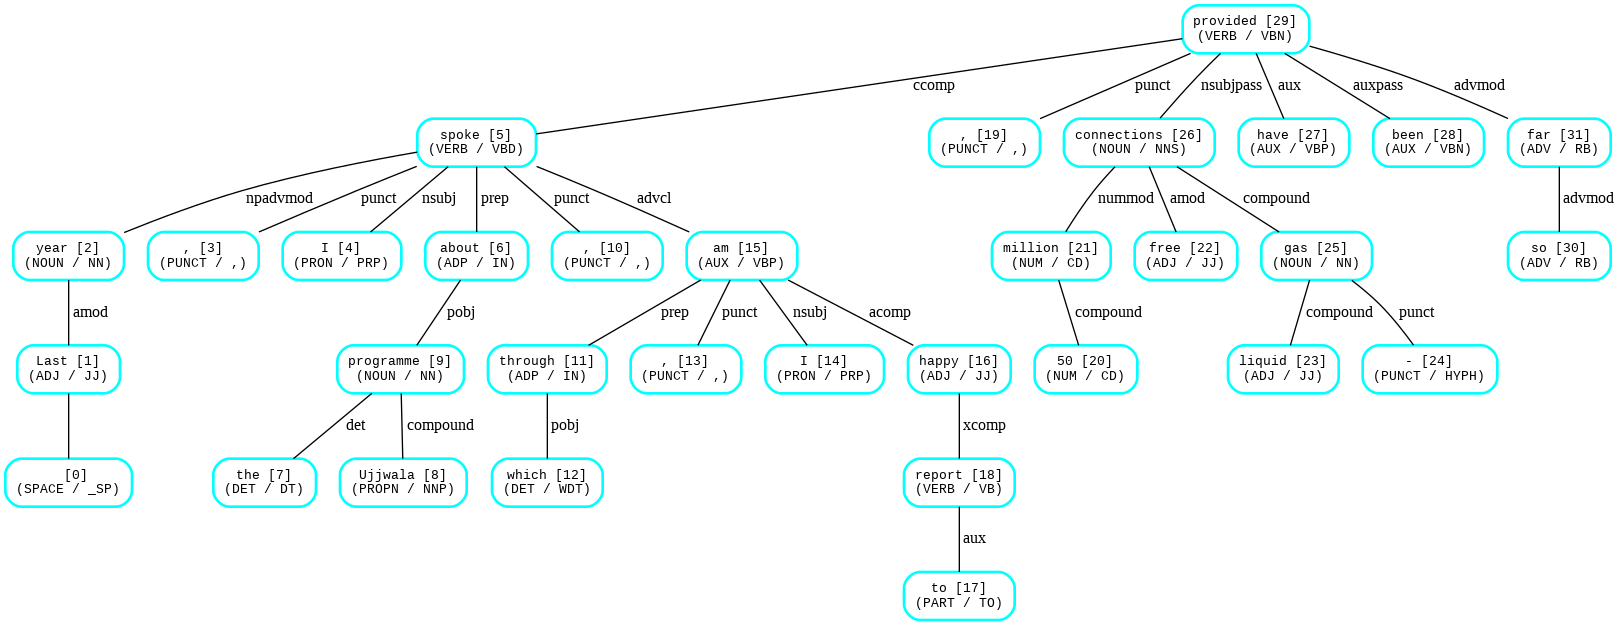

In [ ]:
# Printing dependency tree
doc = nlp(' Last year, I spoke about the Ujjwala programme , through which, I am happy to report, 50 million free liquid-gas connections have been provided so far')
png = visualise_spacy_tree.create_png(doc)
display(Image(png))

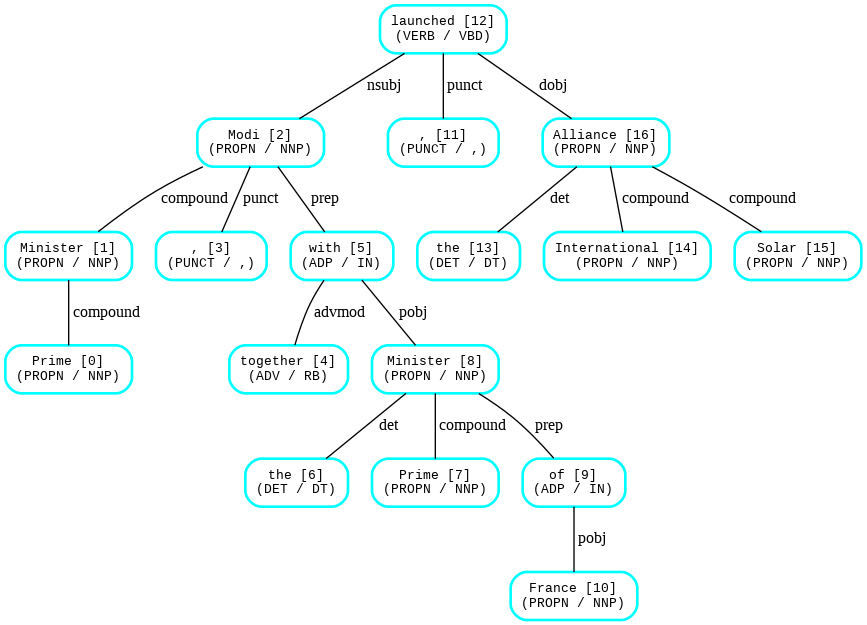

In [ ]:
doc = nlp('Prime Minister Modi, together with the Prime Minister of France, launched the International Solar Alliance')
png = visualise_spacy_tree.create_png(doc)
display(Image(png))

In [ ]:
# rule to extract initiative name
def sent_subtree(text):
    
    # pattern match for schemes or initiatives
    patterns = [r'\b(?i)'+'plan'+r'\b',
           r'\b(?i)'+'programme'+r'\b',
           r'\b(?i)'+'scheme'+r'\b',
           r'\b(?i)'+'campaign'+r'\b',
           r'\b(?i)'+'initiative'+r'\b',
           r'\b(?i)'+'conference'+r'\b',
           r'\b(?i)'+'agreement'+r'\b',
           r'\b(?i)'+'alliance'+r'\b']
    
    schemes = []
    doc = nlp(text)
    flag = 0
    # if no initiative present in sentence
    for pat in patterns:
        
        if re.search(pat, text) != None:
            flag = 1
            break
    
    if flag == 0:
        return schemes

    # iterating over sentence tokens
    for token in doc:

        for pat in patterns:
                
            # if we get a pattern match
            if re.search(pat, token.text) != None:

                word = ''
                # iterating over token subtree
                for node in token.subtree:
                    # only extract the proper nouns
                    if (node.pos_ == 'PROPN'):
                        word += node.text+' '

                if len(word)!=0:
                    schemes.append(word)

    return schemes      

# derive initiatives
df2['Schemes2'] = df2['Sent'].apply(sent_subtree)

In [ ]:
count = 0
for i in range(len(df2)):
  if len(df2.loc[i,"Schemes2"]) != 0:
    count+=1

print(count)

275


In [ ]:
df2.head()

,Year,Sent,wordcount,PM_Names,Check_Schemes,Schemes1,Schemes2
0,1974,"Mr President, I have already had occasion to c...",25,[],0,[],[]
1,1974,On the present occasion I am happy to convey ...,39,[],0,[],[]
2,1974,We are fortunate indeed in having him as our ...,34,[],0,[],[]
3,1974,In the 29 years of its existence the United N...,25,[],0,[],[]
4,1974,While this is indeed a matter for satisfactio...,20,[],0,[],[]


In [ ]:
year = "2018"

for i in range(len(df2)):
  if df2.loc[i,"Year"] == year:
    if len(df2.loc[i,"Schemes2"]) != 0:
      print("--> ",df2.loc[i,"Year"],",",df2.loc[i,"Schemes2"],":")
      print(df2.loc[i,"Sent"])

-->  2018 , ['National Health Protection Scheme '] :
 The Ayushman Bharat Yojana, or National Health Protection Scheme, is the answer to that prayer
-->  2018 , ['Micro Units Development Refinance Agency '] :
 Two extremely effective programmes have also been initiated to increase the skill levels of those waiting to be employed through the National Skill Development Corporation and the Micro Units Development and Refinance Agency  programme, which seeks to turn the poor into entrepreneurs
-->  2018 , ['MUDRA '] :
 The most significant aspect of the MUDRA scheme is the fact that 76 per cent of its beneficiaries are women
-->  2018 , ['Ujjwala '] :
 Last year, I spoke about the Ujjwala programme , through which, I am happy to report, 50 million free liquid gas connections have been provided so far
-->  2018 , ['India '] :
 Another such initiative is the maternity benefit programme, in which women in India are provided with 26 weeks of paid leave to care for their newborns
-->  2018 , ['

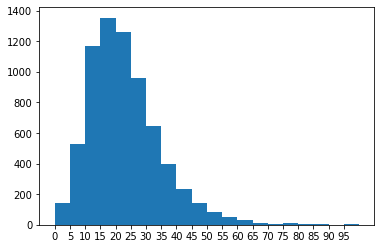

In [ ]:
plt.hist(df2['wordcount'],bins=20,range=[0,100])
plt.xticks(np.arange(0,100,5));

### Looking at the histogram, we can see that most of the sentences range from 15-20 words. So I am going to work with sentences that have no more than 15 words.



In [ ]:
row_list = []
for i in range(len(df2)):
  sent = df2.loc[i,"Sent"]

  if ("," not in sent) and (len(sent.split()) <= 15):
    length = len(sent.split())
    year = df2.loc[i,"Year"]
    dict1 = {"Year":year,"Sent":sent,"Len":length}
    row_list.append(dict1)

df3 = pd.DataFrame(row_list)

In [ ]:
df3.head()

,Year,Sent,Len
0,1974,Guinea Bissau has attained independence and w...,13
1,1974,Now I should like to turn my attention to the...,13
2,1974,The maritime boundary agreement with Sri Lank...,11
3,1974,We have no intention of making nuclear weapons,8
4,1974,We welcome this development as a positive con...,14


In [ ]:
df2.shape

(7032, 7)

In [ ]:
from random import randint

def rand_sent(df):
  index = randint(0,len(df))
  print("Index = ",index)
  doc = nlp(df.loc[index,"Sent"][1:])
  displacy.render(doc, style='dep',jupyter=True)
    
  return index

In [ ]:
rand_sent(df3)

Index =  215


215

In [ ]:
def output_per(df,col_out):
  
  result = 0
  for out in df[col_out]:
    if len(out) != 0:
      result += 1
  
  per = result / len(df)
  per *= 100
  return per

In [ ]:
# To download dependency graphs to local folder
from pathlib import Path

text = df3.loc[9,'Sent'][1:]

doc = nlp(text)
img = displacy.render(doc, style='dep',jupyter=True)
img

In [ ]:
def rule1(text):
  doc = nlp(text)

  sent = []

  for token in doc:

    if(token.pos_ == "VERB"):
      phrase =''

      # Only extract noun or pronoun subjects
      for sub_tok in token.lefts:

        if(sub_tok.dep_ in ["nsubj",'nsubjpass']) and (sub_tok.pos_ in ["NOUN","PROPN","PRON"]):

          # Add subject to the phrase
          phrase += sub_tok.text

          # Save the root of the word in phrase
          phrase += ' '+token.lemma_

          # Check for noun or pronoun direct objects
          for sub_tok in token.rights:
            # Save the object in the phrase
            if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
              phrase += ' '+sub_tok.text
              sent.append(phrase)


  return sent

In [ ]:
# Create a df containing sentence and its output for rule 1
row_list = []

for i in range(len(df3)):
    
    sent = df3.loc[i,'Sent']
    year = df3.loc[i,'Year']
    output = rule1(sent)
    dict1 = {'Year':year,'Sent':sent,'Output':output}
    row_list.append(dict1)
    
df_rule1 = pd.DataFrame(row_list)

# Rule 1 achieves 20% result on simple sentences
output_per(df_rule1,'Output')

22.81134401972873

# We are getting more than 20% pattern match for our rule, we can check it for all the sentences in the corpus.

In [ ]:
row_list = []

for i in range(len(df2)):

  sent = df2.loc[i,"Sent"]
  year = df2.loc[i,"Year"]
  output = rule1(sent)
  dict1 = {"Year":year,"Sent":sent,"Output":output}
  row_list.append(dict1)

df_rule1_all = pd.DataFrame(row_list)


# Check rule1 output on complete speeches
output_per(df_rule1_all,'Output')

31.541524459613196

In [ ]:
df_show = pd.DataFrame(columns=df_rule1_all.columns)
for row in range(len(df_rule1_all)):
  if len(df_rule1_all.loc[row,"Output"]) != 0:
    df_show = df_show.append(df_rule1_all.loc[row,:])


df_show.reset_index(inplace=True)
df_show.drop("index",axis=1,inplace=True)

In [ ]:
df_rule1_all.shape, df_show.shape

((7032, 3), (2218, 3))

In [ ]:
txt = "What will be extracted is countries face threats, which should give us a fair idea about what the sentence is trying to say."

In [ ]:
doc = nlp(txt)
sent = []


for token in doc:
  # If the token is a verb
  if (token.pos_=='VERB'):
    phrase = ''
    
    for sub_tok in token.lefts:
      print(sub_tok.dep_)
      if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
        # Add subject to the phrase
        phrase += sub_tok.text
        phrase += ' '+token.lemma_ 
        # print(phrase)

        for sub_tok in token.rights:
          # Save the object in the phrase
          if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
            phrase += ' '+sub_tok.text
            sent.append(phrase)
      
    print(sent)


[]
nsubjpass
aux
auxpass
[]
[]
nsubj
aux
[]
nsubj
aux
[]
dobj
aux
[]


In [ ]:
verb_dict = {}
dis_dict = {}
dist_list = []

for i in range(len(df_show)):
  # sentence containing the output
  sentence = df_show.loc[i,"Sent"]
  year = df_show.loc[i,"Year"]
  output = df_show.loc[i,"Output"]

  for sent in output:
    n1 = sent.split()[:1]
    v = sent.split()[1]
    n2 = sent.split()[2:]

    dis_dict = {'Sent':sentence,'Year':year,'Noun1':n1,'Verb':v,'Noun2':n2}
    dist_list.append(dis_dict)

    verb = sent.split()[1]

    if verb in verb_dict:
      verb_dict[verb] += 1
    else:
      verb_dict[verb] = 1


df_sep = pd.DataFrame(dist_list)

In [ ]:
df_sep.head()

,Sent,Year,Noun1,Verb,Noun2
0,"Mr President, I have already had occasion to c...",1974,[I],have,[occasion]
1,"In our view, this Assembly should therefore c...",1974,[Assembly],consider,[means]
2,Guinea Bissau has attained independence and w...,1974,[Bissau],attain,[independence]
3,We welcome the installation of an interim Gov...,1974,[We],welcome,[installation]
4,This is an irreversible trend and we are conf...,1974,[people],win,[freedom]
